In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
raw_data=pd.read_csv("1.03.+Dummies.csv")

In [3]:
data=raw_data.copy()

In [5]:
data["Attendance"]=data["Attendance"].map({"Yes":1,"No":0})


In [7]:
y=data["GPA"]
x1=data[["SAT","Attendance"]]

In [8]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

D:\softwares\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           2.19e-15
Time:                        13:48:53   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

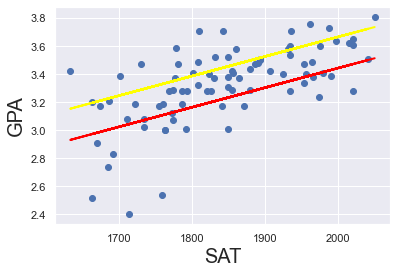

In [9]:
plt.scatter(data["SAT"],y)
yhat_no=0.6439+0.0014*data["SAT"]
yhat_yes=0.8665+0.0014*data["SAT"]
fig=plt.plot(data["SAT"],yhat_no,lw=2,c="red")
fig=plt.plot(data["SAT"],yhat_yes,lw=2,c="yellow")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.show()

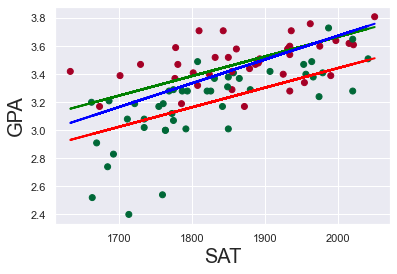

In [17]:
plt.scatter(data["SAT"],data["GPA"],c=data["Attendance"],cmap="RdYlGn_r")
yhat_no=0.6439+0.0014*data["SAT"]
yhat_yes=0.8665+0.0014*data["SAT"]
fig=plt.plot(data["SAT"],yhat_no,lw=2,c="red")
fig=plt.plot(data["SAT"],yhat_yes,lw=2,c="green")
yhat=0.0017*data["SAT"]+0.275
fig=plt.plot(data["SAT"],yhat,lw=2,c="blue")
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.show()

In [18]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [20]:
new_data=pd.DataFrame({"const":1,"SAT":[1700,1670],"Attendance":[0,1]})
new_data=new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [23]:
predictions=result.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [25]:
predictionsdf=pd.DataFrame({"predicted value":predictions})
joined=new_data.join(predictionsdf)
joined.rename(index={0:"Bob",1:"Alice"})

,const,SAT,Attendance,predicted value
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
